In [1]:
!pip install TensorFlow

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 10070 files belonging to 6 classes.


In [5]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

315

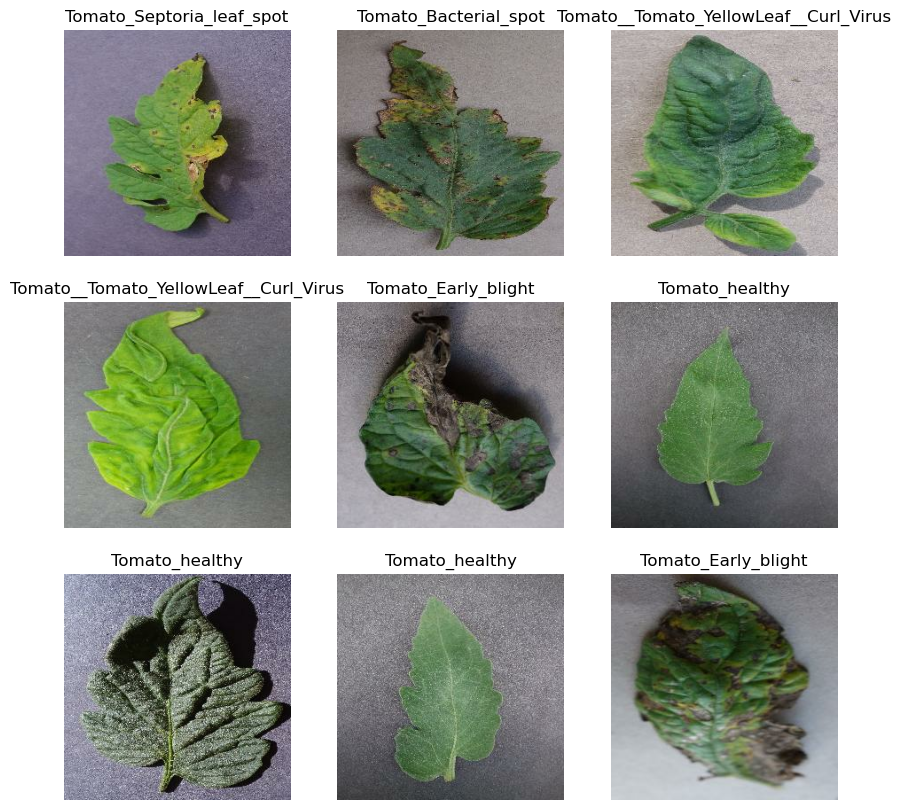

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

315

In [9]:
#80% ==> training
#20% ==> 10% validation,10% test

In [10]:
train_size = 0.8
len(dataset)*train_size

252.0

In [11]:
train_ds=dataset.take(252)
len(train_ds)

252

In [12]:
test_ds = dataset.skip(252)
len(test_ds)

63

In [13]:
val_size=0.1
len(dataset)*val_size

31.5

In [14]:
val_ds = test_ds.take(31)
len(val_ds)

31

In [15]:
test_ds = test_ds.skip(31)
len(test_ds)

32

In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
   
    ds_size =len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
   
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
   
    train_ds = ds.take(train_size)
   
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

252

In [19]:
len(val_ds)

31

In [20]:
len(test_ds)

32

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0,255)

])

In [23]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =6

model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds


)

Epoch 1/50


252/252 [==============================] - 151s 557ms/step - loss: 2.4421 - accuracy: 0.3439 - val_loss: 1.3772 - val_accuracy: 0.4002
Epoch 2/50
252/252 [==============================] - 130s 511ms/step - loss: 1.2302 - accuracy: 0.5297 - val_loss: 1.0052 - val_accuracy: 0.6191
Epoch 3/50
252/252 [==============================] - 113s 443ms/step - loss: 0.9126 - accuracy: 0.6677 - val_loss: 0.6248 - val_accuracy: 0.7851
Epoch 4/50
252/252 [==============================] - 114s 447ms/step - loss: 0.8048 - accuracy: 0.7030 - val_loss: 0.6350 - val_accuracy: 0.7709
Epoch 5/50
252/252 [==============================] - 113s 447ms/step - loss: 0.6968 - accuracy: 0.7424 - val_loss: 0.7120 - val_accuracy: 0.7464
Epoch 6/50
252/252 [==============================] - 113s 443ms/step - loss: 0.6716 - accuracy: 0.7488 - val_loss: 0.9328 - val_accuracy: 0.6578
Epoch 7/50
252/252 [==============================] - 113s 443ms/step - loss: 0.6457 - accuracy: 0.7620 - val_loss: 0.5077

In [28]:
scores = model.evaluate(test_ds)

32/32 [==============================] - 52s 187ms/step - loss: 0.1266 - accuracy: 0.9551


In [29]:
scores

[0.12662386894226074, 0.955078125]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 252}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

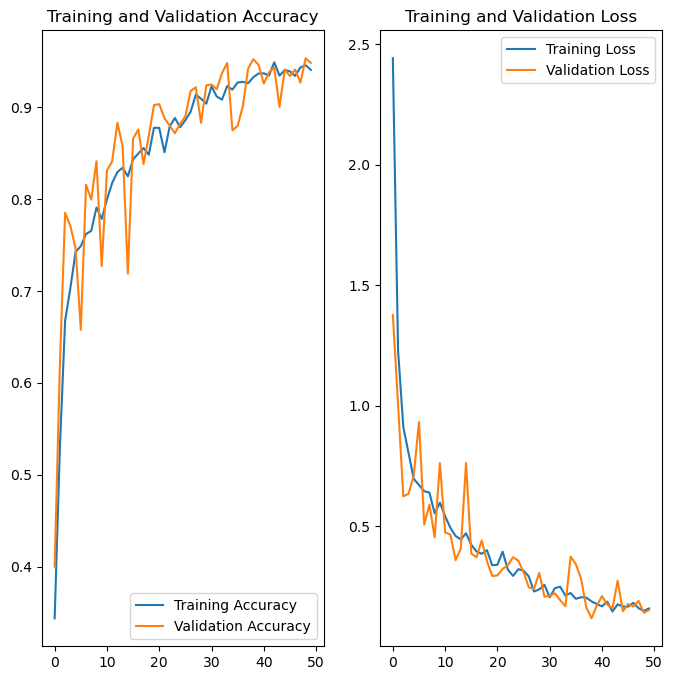

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
#np.argmax([9.9426055e-01,5.7379100e-03,1.5213772e-06])

first image to predict
first image's actual label: Tomato_Bacterial_spot
1/1 [==============================] - 2s 2s/step
predicted label: Tomato_Bacterial_spot


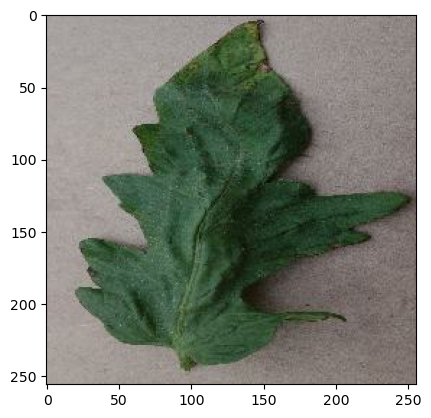

In [36]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 41ms/step


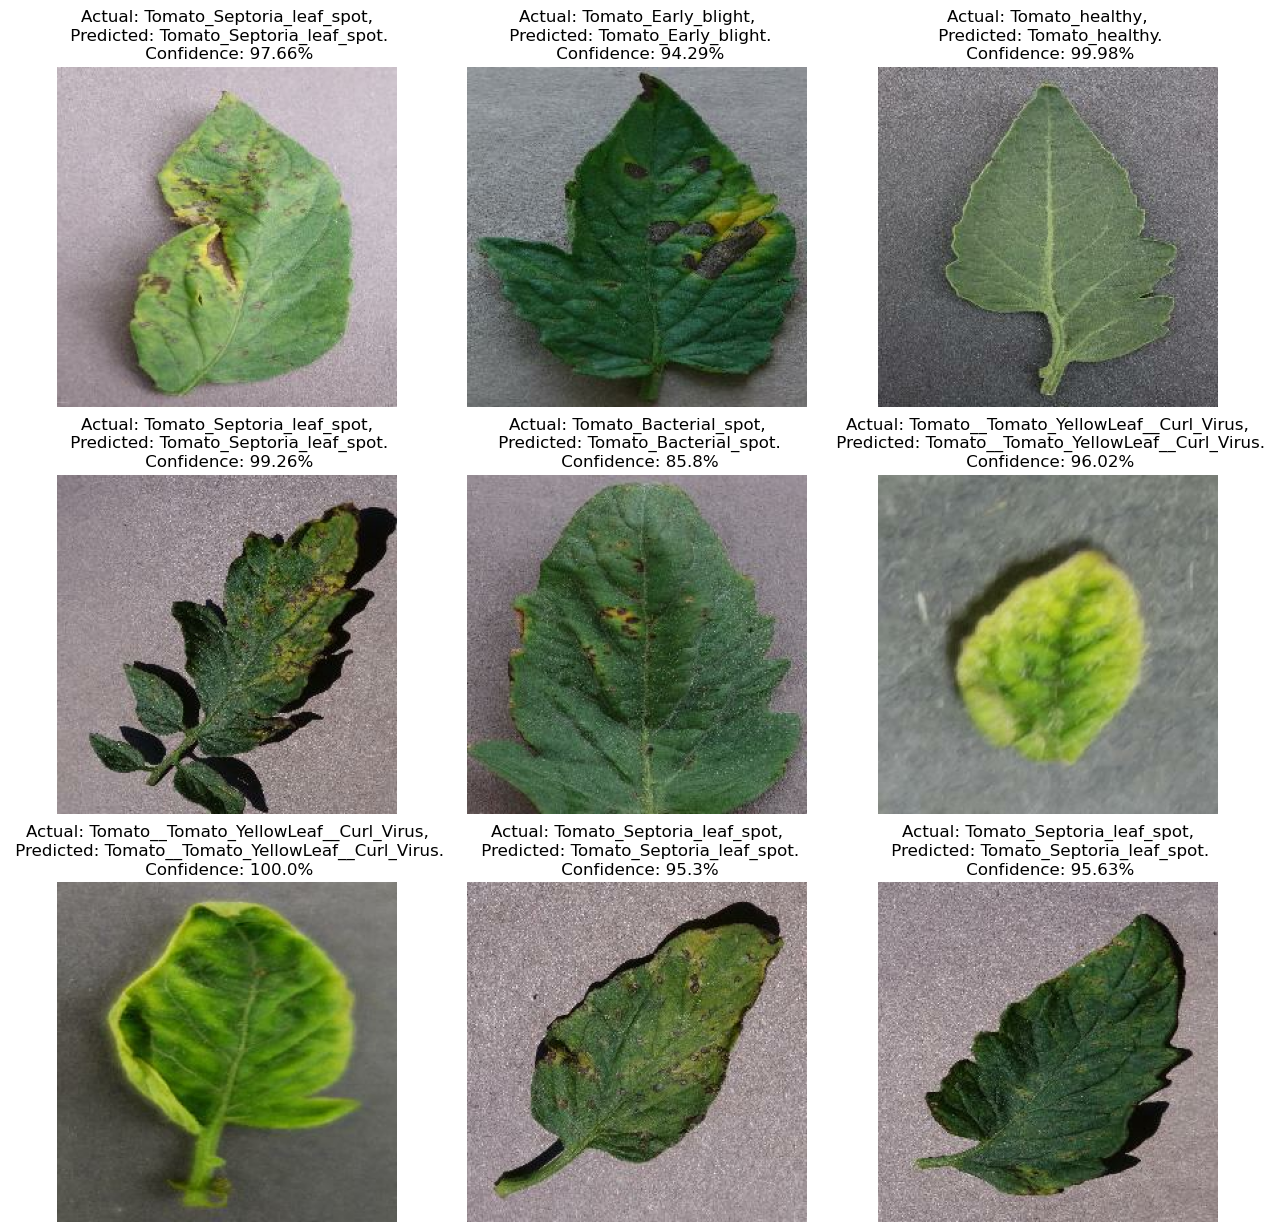

In [38]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [40]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
